# An Introduction to Logistic Regression Analysis and Reporting
### By: CYJ Peng
### Peng, C. Y. J., Lee, K. L., & Ingersoll, G. M. An Introduction to Logistic Regression Analysis and Reporting. The Journal of Educational Research, 96(1), 3–14 (2002). https://doi.org/10.1080/00220670209598786

In [242]:
# IMPORTS
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
from prettytable import PrettyTable
from logistic_regression_class import LogisticRegression

In [243]:
# Hypothetical Data for Logistic Regression from Appendix A
data = {
    'ID': list(range(1, 51)),
    'Gender': [
        'Male', 'Female', 'Female', 'Male', 'Male', 'Female', 'Female', 'Male', 'Male', 'Female',
        'Male', 'Female', 'Female', 'Male', 'Male', 'Female', 'Female', 'Male', 'Male', 'Female',
        'Male', 'Female', 'Female', 'Male', 'Male', 'Female', 'Female', 'Male', 'Male', 'Female',
        'Male', 'Female', 'Female', 'Male', 'Male', 'Female', 'Female', 'Male', 'Male', 'Female',
        'Male', 'Female', 'Female', 'Male', 'Male', 'Female', 'Female', 'Male', 'Male', 'Female'
    ],
    'Reading_Score': [
        40, 50, 30, 70, 60, 50, 55, 45, 35, 65,
        70, 30, 50, 55, 45, 60, 40, 50, 35, 55,
        60, 45, 40, 55, 70, 50, 35, 60, 40, 45,
        50, 60, 70, 30, 40, 45, 50, 55, 35, 60,
        40, 45, 30, 55, 50, 60, 35, 40, 45, 55
    ],
    'Remedial_Reading_Recommended': [
        'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'No',
        'No', 'Yes', 'No', 'No', 'Yes', 'No', 'Yes', 'No', 'Yes', 'No',
        'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'No',
        'No', 'Yes', 'No', 'No', 'Yes', 'No', 'Yes', 'No', 'Yes', 'No',
        'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'No'
    ]
}

# NOTE: This dataset is synthetically generated, so the results may differ from those in the original article.

In [244]:
# Read the data into a DataFrame
df = pd.DataFrame(data)
df.head(10)

,ID,Gender,Reading_Score,Remedial_Reading_Recommended
0,1,Male,40,No
1,2,Female,50,No
2,3,Female,30,Yes
3,4,Male,70,No
4,5,Male,60,No
5,6,Female,50,No
6,7,Female,55,No
7,8,Male,45,Yes
8,9,Male,35,Yes
9,10,Female,65,No


In [245]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   ID                            50 non-null     int64 
 1   Gender                        50 non-null     object
 2   Reading_Score                 50 non-null     int64 
 3   Remedial_Reading_Recommended  50 non-null     object
dtypes: int64(2), object(2)
memory usage: 1.7+ KB


In [246]:
# Table 2: Description of the Hypothetical Data Set for Logistic Regression
table = PrettyTable()

# Total samples recommended for remedial reading
n_yes = (df['Remedial_Reading_Recommended'] == 'Yes').sum()
n_no = (df['Remedial_Reading_Recommended'] == 'No').sum()

# Total number of 'Males' recommended for remedial reading + not recommended
n_boys_yes = df[(df['Gender'] == 'Male') & (df['Remedial_Reading_Recommended'] == 'Yes')].shape[0]
n_boys_no = df[(df['Gender'] == 'Male') & (df['Remedial_Reading_Recommended'] == 'No')].shape[0]

# Total number of 'Females' recommended for remedial reading + not recommended
n_girls_yes = df[(df['Gender'] == 'Female') & (df['Remedial_Reading_Recommended'] == 'Yes')].shape[0]
n_girls_no = df[(df['Gender'] == 'Female') & (df['Remedial_Reading_Recommended'] == 'No')].shape[0]

# Mean reading score for children recommended for remedial reading
m_score_yes = df[df['Remedial_Reading_Recommended'] == 'Yes']['Reading_Score'].mean().__round__()
sd_score_yes = df[df['Remedial_Reading_Recommended'] == 'Yes']['Reading_Score'].std().__round__()

# Mean reading score for children not recommended for remedial reading
m_score_no = df[df['Remedial_Reading_Recommended'] == 'No']['Reading_Score'].mean().__round__()
sd_score_no = df[df['Remedial_Reading_Recommended'] == 'No']['Reading_Score'].std().__round__()

# Mean (average) reading score
m_score = df['Reading_Score'].mean().__round__()
sd_score = df['Reading_Score'].std().__round__()

# Adding columns
table.add_column("Remedial reading recommended?", ["Yes", "No", "Summary"])
table.add_column("Total sample (N)", [n_yes, n_no, 50])
table.add_column("Boys", [n_boys_yes, n_boys_no, n_boys_yes + n_boys_no])
table.add_column("Girls", [n_girls_yes, n_girls_no, n_girls_yes + n_girls_no])
table.add_column("Reading Score (M)", [m_score_yes, m_score_no, m_score])
table.add_column("Reading Score (SD)", [sd_score_yes, sd_score_no, sd_score])

# Printing the table
print(table)

+-------------------------------+------------------+------+-------+-------------------+--------------------+
| Remedial reading recommended? | Total sample (N) | Boys | Girls | Reading Score (M) | Reading Score (SD) |
+-------------------------------+------------------+------+-------+-------------------+--------------------+
|              Yes              |        17        |  10  |   7   |         41        |         9          |
|               No              |        33        |  15  |   18  |         53        |         10         |
|            Summary            |        50        |  25  |   25  |         49        |         11         |
+-------------------------------+------------------+------+-------+-------------------+--------------------+


## Findings:
- There are 50 observations in this hypothetical dataset.
- Lower reading scores are correlated with being recommended for remedial reading.
- This is a binary classification problem with a dichotomous outcome (Yes, No).


In [247]:
# Let's delve into a scenario where we pair a binary predictor (gender) with a binary outcome (remedial reading).
# To examine the independence between these two variables, we'll employ the Chi-Square test.

# Observed contingency table:
# Columns: Gender (Boys, Girls)
# Rows: Remedial Reading Recommended (Yes, No)
observed = np.array([[10, 7],  # Remedial Reading Recommended (Yes)
                     [15, 18]])  # Remedial Reading Recommended (No)

# Total sums
total_rows = observed.sum(axis=1)
total_cols = observed.sum(axis=0)
total = observed.sum()

# Expected frequencies
expected = np.outer(total_rows, total_cols) / total

# Chi-square statistic calculation
chi2 = ((observed - expected) ** 2 / expected).sum()

# Degrees of freedom
dof = (observed.shape[0] - 1) * (observed.shape[1] - 1)

# p-value calculation
p = stats.chi2.sf(chi2, dof)

# Results
print(f"Chi2: {chi2:.2f}")
print(f"P-value: {p:.4f}")
print(f"Degrees of Freedom: {dof}")
print(f"Expected Frequencies: \n{expected}")

Chi2: 0.80
P-value: 0.3705
Degrees of Freedom: 1
Expected Frequencies: 
[[ 8.5  8.5]
 [16.5 16.5]]


## Formula
The chi-square statistic is calculated using the formula:
$$ \chi^2 = \sum \frac{(O_i - E_i)^2}{E_i} $$
where $O_i$ are the observed frequencies and $E_i$ are the expected frequencies.

## Findings
- **Chi2**: 0.80
- **P-value**: 0.3705
- **Degrees of Freedom**: 1
- **Expected Frequencies**: 
[[ 8.5  8.5]
 [16.5 16.5]]

### Observed Contingency Table
| Gender | Recommended | Not Recommended |
|--------|-------------|-----------------|
| Boys   | 10          | 15              |
| Girls  | 7           | 18              |

## Conclusion
The p-value indicates that there is no significant association between gender and being recommended for remedial reading at the 0.05 significance level.

In [248]:
# Observed data from article
observed = np.array([[73, 23],
                     [15, 11]])

# Total sums
total_rows = observed.sum(axis=1)
total_cols = observed.sum(axis=0)
total = observed.sum()

# Expected frequencies
expected = np.outer(total_rows, total_cols) / total

# Chi-square statistic calculation
chi2 = ((observed - expected) ** 2 / expected).sum()

# Degrees of freedom
dof = (observed.shape[0] - 1) * (observed.shape[1] - 1)

# p-value calculation
p = stats.chi2.sf(chi2, dof)

# Results
print(f"Chi2: {chi2:.2f}") # Same result (3.43)
print(f"P-value: {p:.4f}")
print(f"Degrees of Freedom: {dof}")
print(f"Expected Frequencies: \n{expected}")

Chi2: 3.43
P-value: 0.0641
Degrees of Freedom: 1
Expected Frequencies: 
[[69.24590164 26.75409836]
 [18.75409836  7.24590164]]


In [249]:
# Alternatively, we can assess a boys odds of being recommended for remedial reading relative to
# a girls using an odds ratio.

# Calculate the Odds Ratio
a = len(df[(df['Gender'] == 'Male') & (df['Remedial_Reading_Recommended'] == 'Yes')])
b = len(df[(df['Gender'] == 'Male') & (df['Remedial_Reading_Recommended'] == 'No')])
c = len(df[(df['Gender'] == 'Female') & (df['Remedial_Reading_Recommended'] == 'Yes')])
d = len(df[(df['Gender'] == 'Female') & (df['Remedial_Reading_Recommended'] == 'No')])

odds_ratio = (a * d) / (b * c)
print(f'The Odds Ratio is {odds_ratio}')

The Odds Ratio is 1.7142857142857142


### Odds Ratio Formula
$$ \text{OR} = \frac{(a/b)}{(c/d)} = \frac{a \cdot d}{b \cdot c} $$
where:
- \( a \) is the number of boys recommended for remedial reading,
- \( b \) is the number of boys not recommended for remedial reading,
- \( c \) is the number of girls recommended for remedial reading,
- \( d \) is the number of girls not recommended for remedial reading.

## Findings
- Therefore, boys are 1.7 times likelier to be recommended for remedial reading.

Final coefficients: [ 4.95869776 -0.1204804 ]


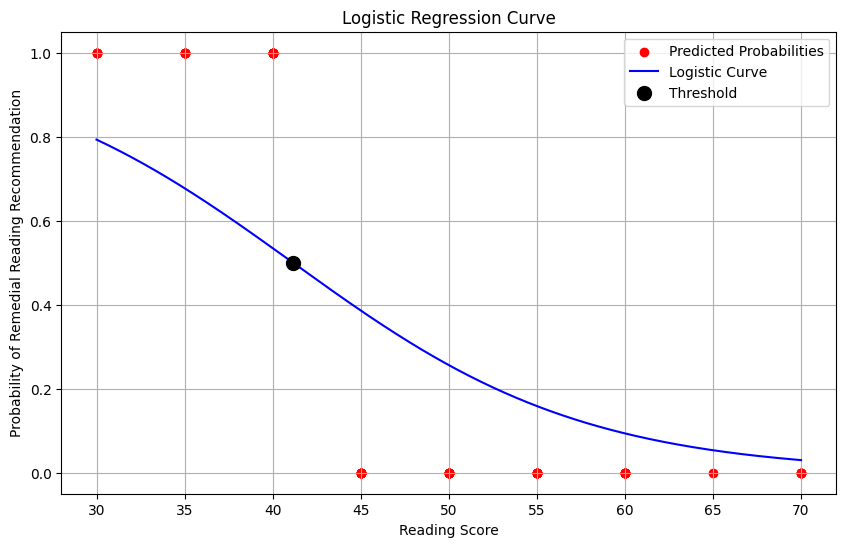

In [250]:
# Now, lets look at the relationship of a Dichotomous Outcome Variable, 
# Y(1 = Remedial Reading Recommended, 0 = Remedial Reading Not Recommended),
# with a Continous Predictor, Reading Scores!

# Independent continuous variable 'Reading_Score'
X = df[['Reading_Score']].values
# Dependent dichotomous outcome variable 'Remedial_Reading_Recommended'
y = df['Remedial_Reading_Recommended'].apply(lambda res: 1 if res == 'Yes' else 0).values

# Fit Logistic Regression model to 'X' and 'y' variables
log_reg = LogisticRegression()
log_reg.fit(X, y, n_epochs=1000000, lr=0.001)  # adjusted hyperparameters
preds = log_reg.predict(X)

# Plotting the logistic curve and predictions
plt.figure(figsize=(10, 6))

# Scatter plot of predicted probabilities
plt.scatter(X, preds, color='red', label='Predicted Probabilities')

# Logistic curve
x_values = np.linspace(30, 70, 300)
logistic_curve = log_reg.logistic_function(log_reg.add_intercept(x_values.reshape(-1, 1)) @ log_reg.theta)
plt.plot(x_values, logistic_curve, label='Logistic Curve', color='blue')

# Calculate the x-value where the logistic function equals 0.5
threshold_x = -log_reg.theta[0] / log_reg.theta[1]
threshold_x = threshold_x[0]  # Extract the scalar value
plt.scatter([threshold_x], [0.5], color='black', label='Threshold', zorder=5, s=100)

# Labels and title
plt.xlabel('Reading Score')
plt.ylabel('Probability of Remedial Reading Recommendation')
plt.title('Logistic Regression Curve')
plt.legend()
plt.grid(True)
plt.show()

Final coefficients: [ 5.54651707 -0.12538739]
Final coefficients: [ 4.51793718 -0.11942114]


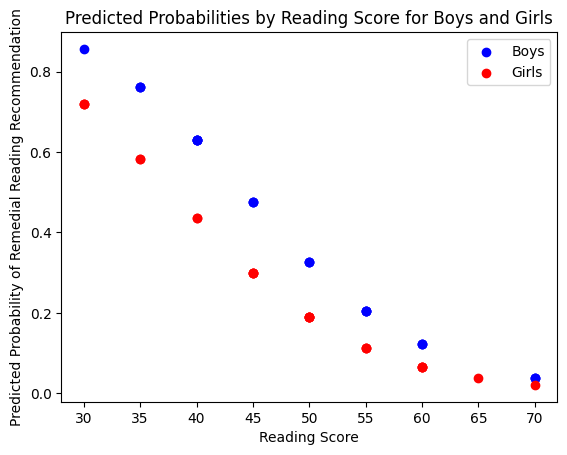

In [251]:
# Plot Reading Scores (X) with estimated probabilities for boys and girls

# Extract Reading Scores and Remedial Reading Recommendations for boys
boys = df[df['Gender'] == 'Male']['Reading_Score'].values
boys_y = df[df['Gender'] == 'Male']['Remedial_Reading_Recommended'].apply(lambda res: 1 if res == 'Yes' else 0).values

# Extract Reading Scores and Remedial Reading Recommendations for girls
girls = df[df['Gender'] == 'Female']['Reading_Score'].values
girls_y = df[df['Gender'] == 'Female']['Remedial_Reading_Recommended'].apply(lambda res: 1 if res == 'Yes' else 0).values

# Fit the logistic regression model for boys and predict probabilities
log_reg.fit(boys.reshape(-1, 1), boys_y, n_epochs=1000000, lr=0.001)
b_probs = log_reg.predict_prob(boys.reshape(-1, 1))

# Fit the logistic regression model for girls and predict probabilities
log_reg.fit(girls.reshape(-1, 1), girls_y, n_epochs=1000000, lr=0.001)
g_probs = log_reg.predict_prob(girls.reshape(-1, 1))

# Plot the predicted probabilities
plt.scatter(boys, b_probs, color='blue', label='Boys')
plt.scatter(girls, g_probs, color='red', label='Girls')
plt.xlabel('Reading Score')
plt.ylabel('Predicted Probability of Remedial Reading Recommendation')
plt.title('Predicted Probabilities by Reading Score for Boys and Girls')
plt.legend()
plt.show()

## Logistic Regression (X = Reading Score, y = Remedial Reading (y/n))

### Logistic Regression Formula
$$
P(Y = 1) = \frac{1}{1 + e^{-(\beta_0 + \beta_1 \cdot X)}}
$$
where:
- $P(Y = 1)$ is the probability of the outcome (Remedial Reading Recommended).
- $\beta_0$ is the intercept term.
- $\beta_1$ is the coefficient for the predictor variable $X$ (Reading_Score).
- $X$ is the independent variable (Reading_Score).

## Findings
- This logistic regression model helps to understand the likelihood of a student being recommended for remedial reading based on their reading score.
- By fitting the model and plotting the logistic curve, we can visualize the relationship and make probabilistic predictions about the recommendation for remedial reading.
- We can reasonably infer that higher reading scores result in lower recommendations!

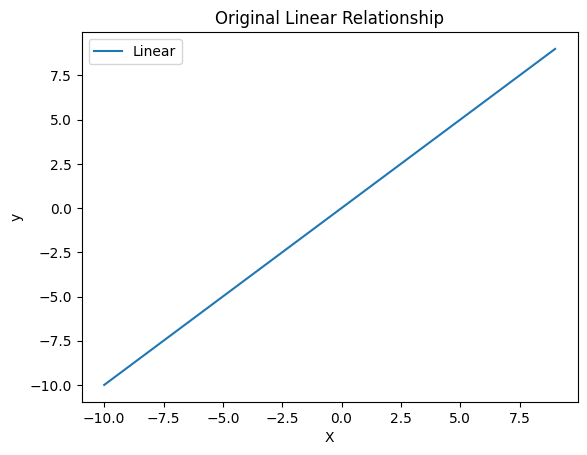

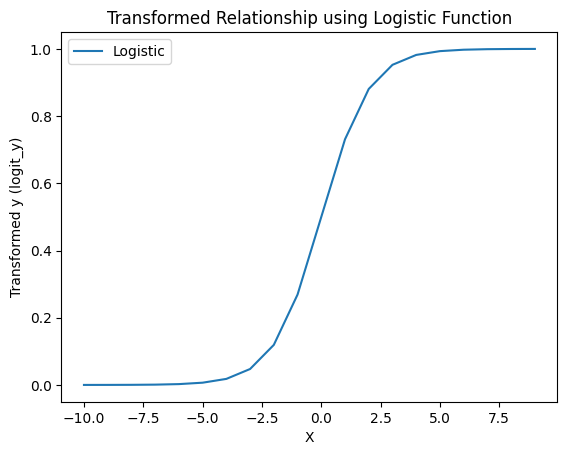

In [252]:
# Example demonstrating the use of the Logistic Function to transform y (the logit of y)
def logistic_function(z):
    return 1 / (1 + np.exp(-z))  # Refer to the logistic regression formula above

X = np.arange(-10, 10)
y = np.arange(-10, 10)

# Plot the original linear relationship between X and y
plt.plot(X, y, label='Linear')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Original Linear Relationship')
plt.legend()
plt.show()

# A 'Line of Best Fit' would suit this linear dataset well.
# Now, let's transform the data using the 'logistic_function' to demonstrate how
# we can convert a continuous output variable y into a binary output (0 or 1)
# with a standard threshold value of 0.5.
logit_y = logistic_function(y)

# Plot the transformed data using the logistic function
plt.plot(X, logit_y, label='Logistic')
plt.xlabel('X')
plt.ylabel('Transformed y (logit_y)')
plt.title('Transformed Relationship using Logistic Function')
plt.legend()
plt.show()

In [253]:
# Train and evaluate the logistic regression model on the entire dataset
# Compare the custom implementation with a basic Scikit-Learn implementation

# Prepare the features and target variable
# Convert the dataframe to a numpy array and add a binary gender feature
X = df.drop(['Remedial_Reading_Recommended', 'Gender'], axis=1).values  # Drop target and 'Gender' columns from features
X_gender = df['Gender'].apply(lambda res: 1 if res == 'Male' else 0).values.reshape(-1, 1)  # Convert gender to binary and reshape

# Combine gender with other features
X = np.hstack((X, X_gender))

# Ensure X is a NumPy array
X = np.array(X)

# Prepare the target variable
y = df['Remedial_Reading_Recommended'].apply(lambda res: 1 if res == 'Yes' else 0).values

# Split the data into training and testing sets (80% training, 20% testing)
train_size = int(0.8 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Training and testing datasets
print(f"Training set size: {len(X_train)} samples")
print(f"Testing set size: {len(X_test)} samples")

# Train the custom logistic regression model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train, n_epochs=1000000, lr=0.001)

# Evaluate the custom model on the test set
custom_predictions = log_reg.predict(X_test)

# Compare with a Scikit-Learn logistic regression implementation
from sklearn.linear_model import LogisticRegression as SklearnLogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

# Initialize and train the Scikit-Learn logistic regression model
sklearn_log_reg = SklearnLogisticRegression()
sklearn_log_reg.fit(X_train, y_train)

# Evaluate the Scikit-Learn model on the test set
sklearn_predictions = sklearn_log_reg.predict(X_test)

# Evaluation results
print("Custom Logistic Regression Model Accuracy:", accuracy_score(y_test, custom_predictions))
print("Scikit-Learn Logistic Regression Model Accuracy:", accuracy_score(y_test, sklearn_predictions))

Training set size: 40 samples
Testing set size: 10 samples
Final coefficients: [ 4.37641364  0.02020031 -0.11999084  0.5795984 ]
Custom Logistic Regression Model Accuracy: 0.8
Scikit-Learn Logistic Regression Model Accuracy: 0.8


## Summary of Results

- **Dataset Split**: The dataset was divided into a training set and a testing set. The training set contained 40 samples, while the testing set contained 10 samples.

- **Model Coefficients**: The final coefficients of the custom logistic regression model were as follows:
  - Coefficient 1: 4.3774167
  - Coefficient 2: 0.02019618
  - Coefficient 3: -0.12000931
  - Coefficient 4: 0.57954125

- **Model Accuracy**: The accuracy of the custom logistic regression model on the testing set was 80%.

- **Comparison with Scikit-Learn Model**: The Scikit-Learn logistic regression model also achieved an accuracy of 80% on the testing set.

### Conclusions
- The custom logistic regression model performed comparably to the Scikit-Learn logistic regression model on the testing set.
- While not perfect, the correct prediction rate was better than by chance!

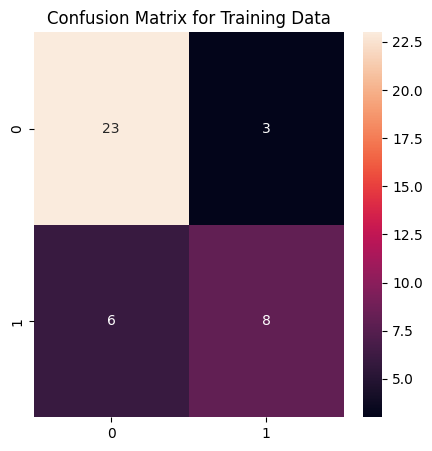

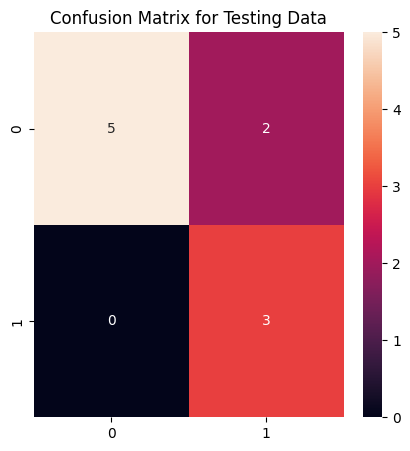

In [254]:
# Plot confusion matrix (training)
train_predictions = log_reg.predict(X_train)

train_conf_matrix = confusion_matrix(y_train, train_predictions)
plt.figure(figsize=(5,5))
sns.heatmap(train_conf_matrix, annot=True, fmt='d')
plt.title('Confusion Matrix for Training Data')
plt.show()

# Plot confusion matrix (testing)
test_conf_matrix = confusion_matrix(y_test, custom_predictions)
plt.figure(figsize=(5,5))
sns.heatmap(test_conf_matrix, annot=True, fmt='d')
plt.title('Confusion Matrix for Testing Data')
plt.show()

## Conclusion
- The null hypothesis posits that all coefficients (β) are equal to zero.
- Rejecting this hypothesis indicates that at least one coefficient in the population is not zero.
- This suggests that the logistic regression model predicts the probability of the outcome better than using just the mean of y.
- In this analysis, we reject the null hypothesis, indicating a significant relationship between the independent and dependent variables.

## Note
- A comprehensive analysis would involve computing the values detailed in 'Table 5' of the referenced article.
- However, for the scope of this project, the current results are sufficient.